# Project Discription

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.



Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


# Target

Your task is to make a mode that can consider the data provided and predict the Average Price.

# Importing Libraries

In [324]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from sklearn.preprocessing import power_transform
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Importing Data

In [325]:
avo=pd.read_csv("avocado.csv")

Data has been imported in form of CSV As provided and saved to Data Frame named avo which will be used to refer dataset throught the EDA

In [326]:
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The above chart shows first 5 rows of the dataset 

In [327]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


The table above provides information about the columns in the dataset

The dataset has 1517 rows and 12 columns 

There are object Int and Float values present here

In [328]:
avo.drop("Unnamed: 0", axis=1,inplace=True)

The very first column of the datasheet i.e Unnamed: 0 has been dropped as it didnt provide any special use in eda as well as designing model

In [329]:
avo.rename(columns={'4046':'Small',
                          '4225':'Large',
                          '4770':'XLarge'}, 
                 inplace=True)

avo.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small', 'Large', 'XLarge',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

The columns 4046, 4225 and 4770 are been renamed for future referance and better visualization

In [330]:
print(avo.isna().sum())

Date            0
AveragePrice    0
Total Volume    0
Small           0
Large           0
XLarge          0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


Checking for Nan values: no nan values present

In [331]:
avo["type"].unique()

array(['conventional'], dtype=object)

"type" column is an object datatype and can have values which can support eda to catagorize data accordingly : only one catagory observed i.e Conventional

In [332]:
avo.eq(0).sum()

Date              0
AveragePrice      0
Total Volume      0
Small             0
Large             0
XLarge            1
Total Bags        0
Small Bags        0
Large Bags      134
XLarge Bags     798
type              0
year              0
region            0
dtype: int64

There are zero values present here which is quite more than accpetance, handling them with median might impact the Model and provide improper result

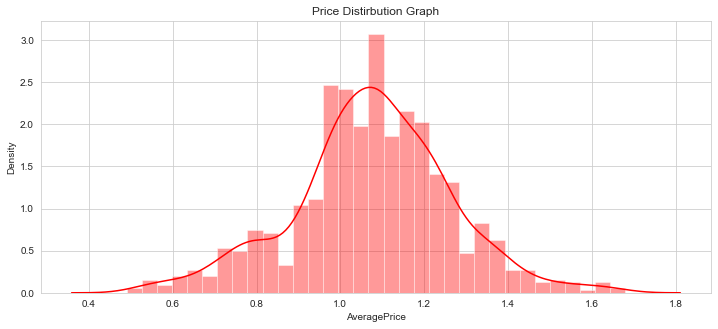

In [333]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(avo["AveragePrice"], color = 'r')

The Target variable i.e Average price is properly skewed and is in a normalized curve distribution

In [334]:
avo['Date']=pd.to_datetime(avo['Date'])
avo['Month']=avo['Date'].apply(lambda x:x.month)
avo['Day']=avo['Date'].apply(lambda x:x.day)

Using Date column to extract year and month and day for future use

In [335]:

avo.head()

,Date,AveragePrice,Total Volume,Small,Large,XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


The above chart shows the updated dataset with 3 new columns added i.e  year, monthm and day

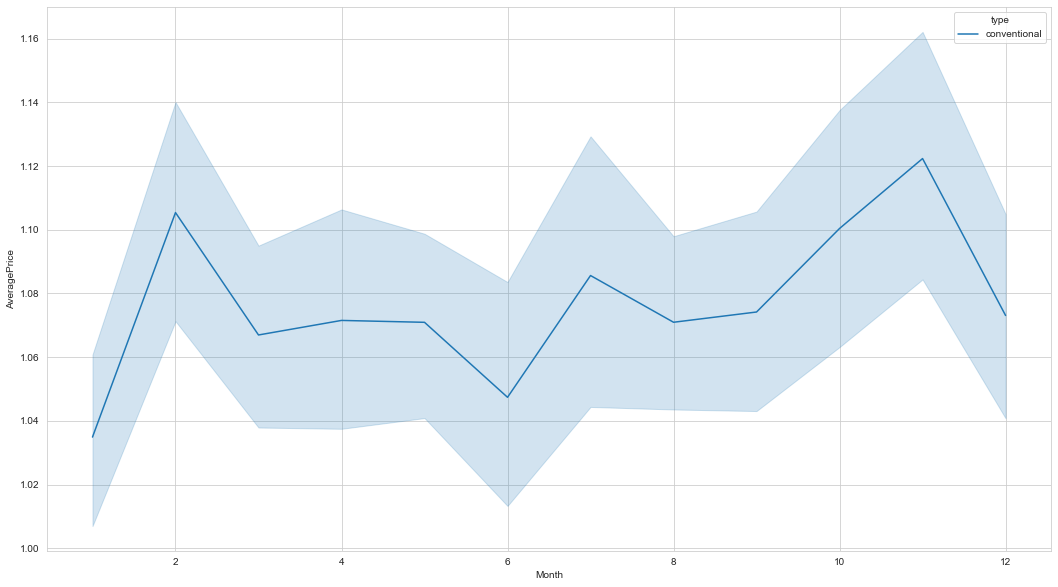

In [336]:

plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=avo)
plt.show()

The above visualization shows the price movement of Avocado over the year on a monthly basis

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

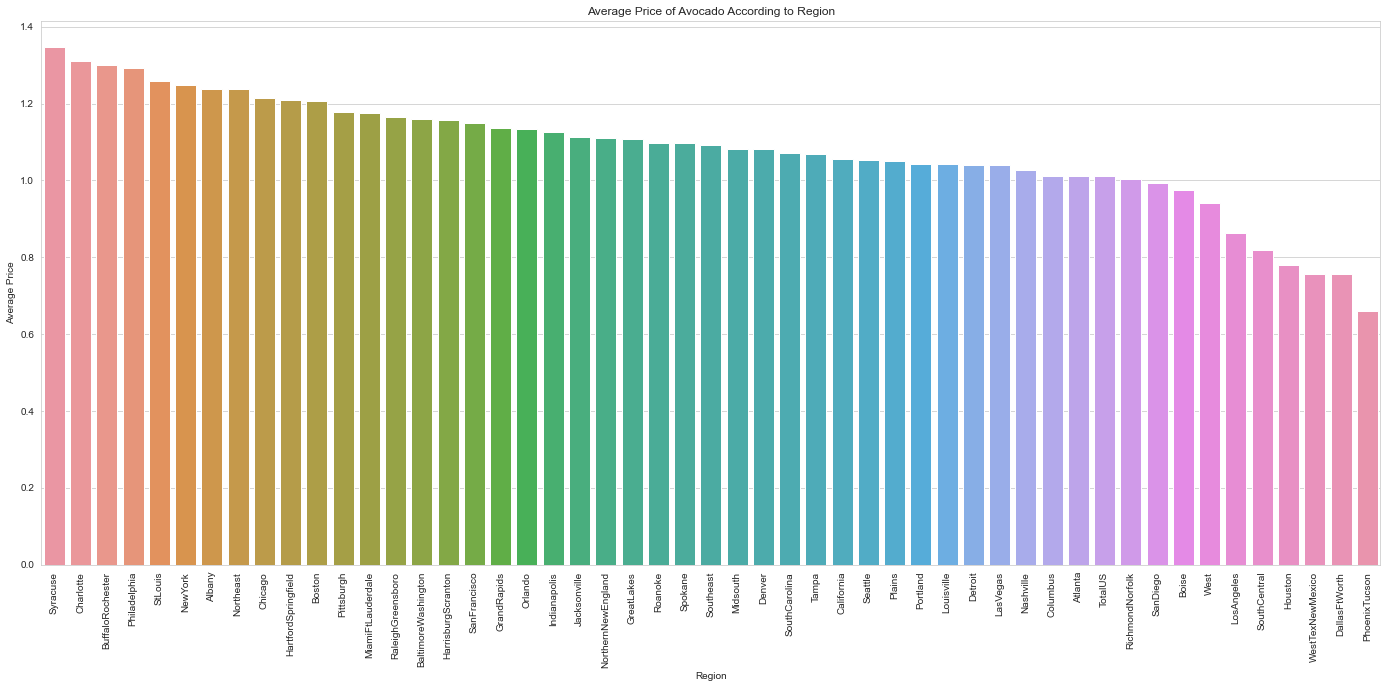

In [337]:
region_list=list(avo.region.unique())
average_price=[]

for i in region_list:
    x=avo[avo.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

temp=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=temp.average_price.sort_values(ascending=False).index.values
sorted_data=temp.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

The above visualization shows the region based price over the starting from the highest price to the lowest price 

<AxesSubplot:>

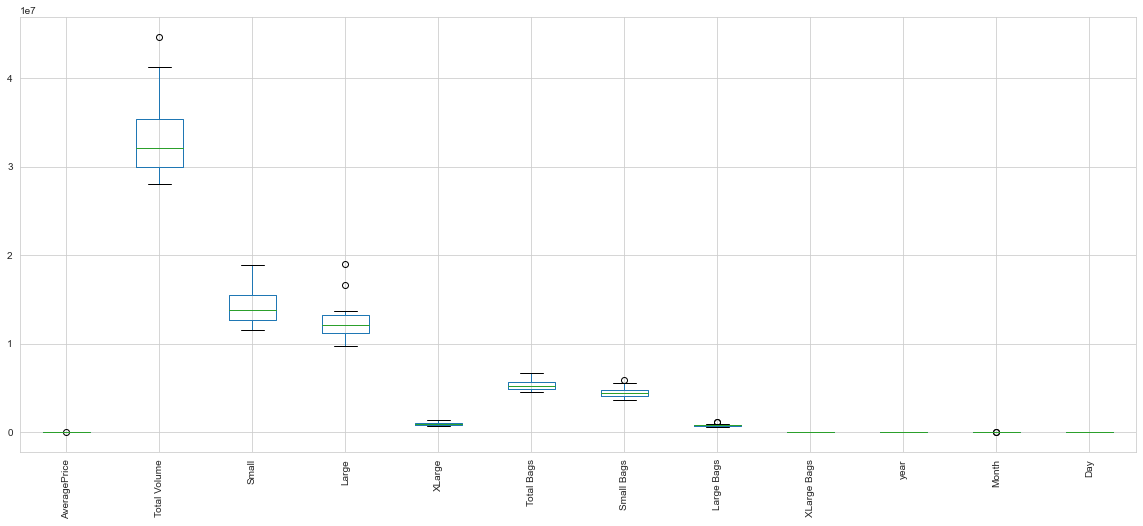

In [338]:
region_filter=avo.region=='TotalUS'
temp=avo[region_filter]

temp.boxplot( rot = 90, figsize=(20,8))

The above box plot is the visualization based on TotalUS value in dataset which seems to have outliers

Text(0.5, 1.0, 'Average of Total Volume According to Region')

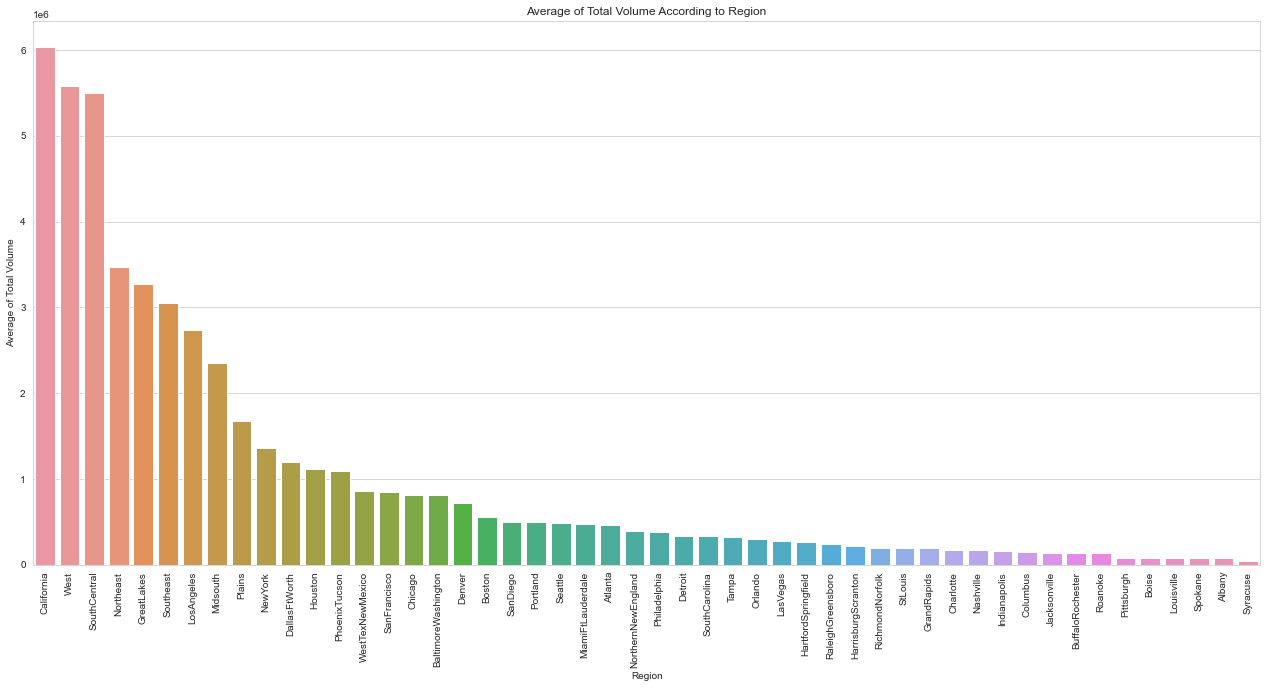

In [339]:
region_filter=avo.region!='TotalUS'
temp=avo[region_filter]

region_list=list(temp.region.unique())
average_total_volume=[]

for i in region_list:
    x=temp[temp.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
temp2=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=temp2.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=temp2.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

The above visualization is a representation of Avocado Comsumption based on region 

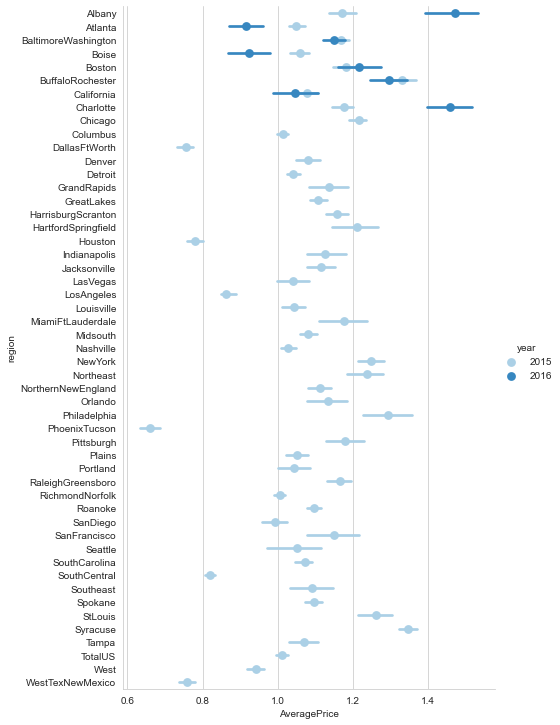

In [340]:


g = sns.factorplot('AveragePrice','region',data=avo,
                   hue='year',
                   size=10,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

The above visualization shows the yearly distribution of AvreagePrice based on region Column

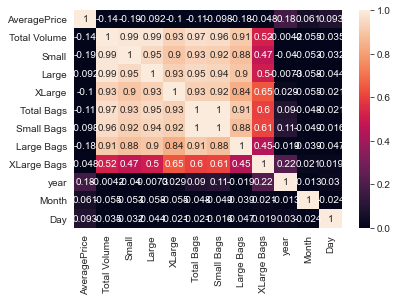

In [341]:
sns.heatmap(avo.corr(),vmax = 1, vmin = 0,annot = True)
plt.show()

The above visualization shows the Correlation between various columns 

Features are not correleted with the Average Price column, instead most of them are correlated with each other.

Text(0.5, 1.0, 'Average Price')

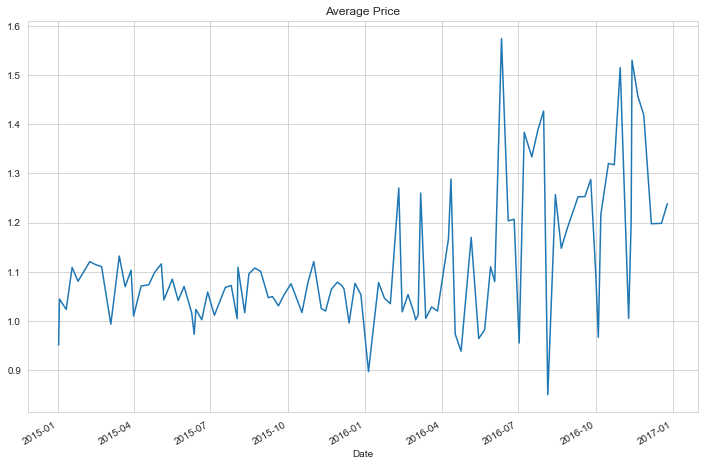

In [342]:
byDate=avo.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

The above visualization shows the graph based on Average price on montly basis representing years and  months

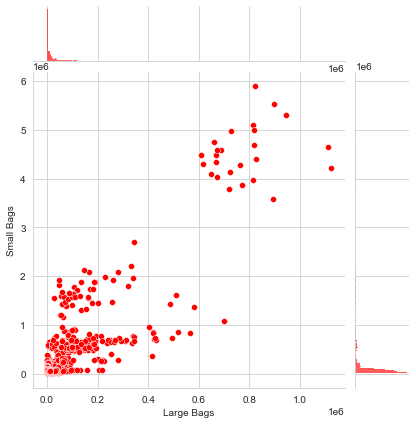

In [343]:
sns.jointplot(x='Large Bags',y='Small Bags',color='red',data=avo)
plt.show()

the above visualization shows relation between large bags and small bags based on Consumption

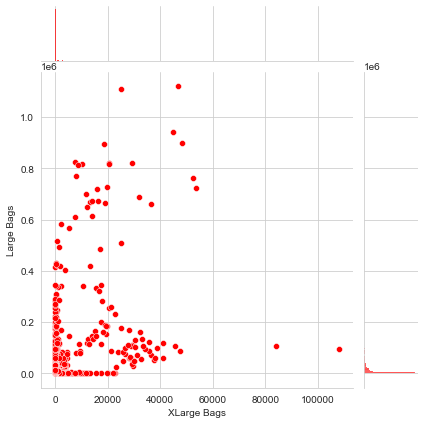

In [344]:
sns.jointplot(x='XLarge Bags',y='Large Bags',data=avo,color='red')
plt.show()

the above visualization shows relation between xlarge bags and large bags based on Consumption

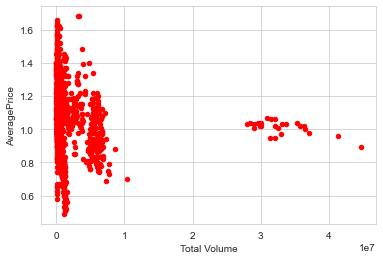

In [345]:
avo.plot(kind = "scatter", x = "Total Volume", y = "AveragePrice",color='red')
plt.show()

the above visualization shows relation between total volume and Average price

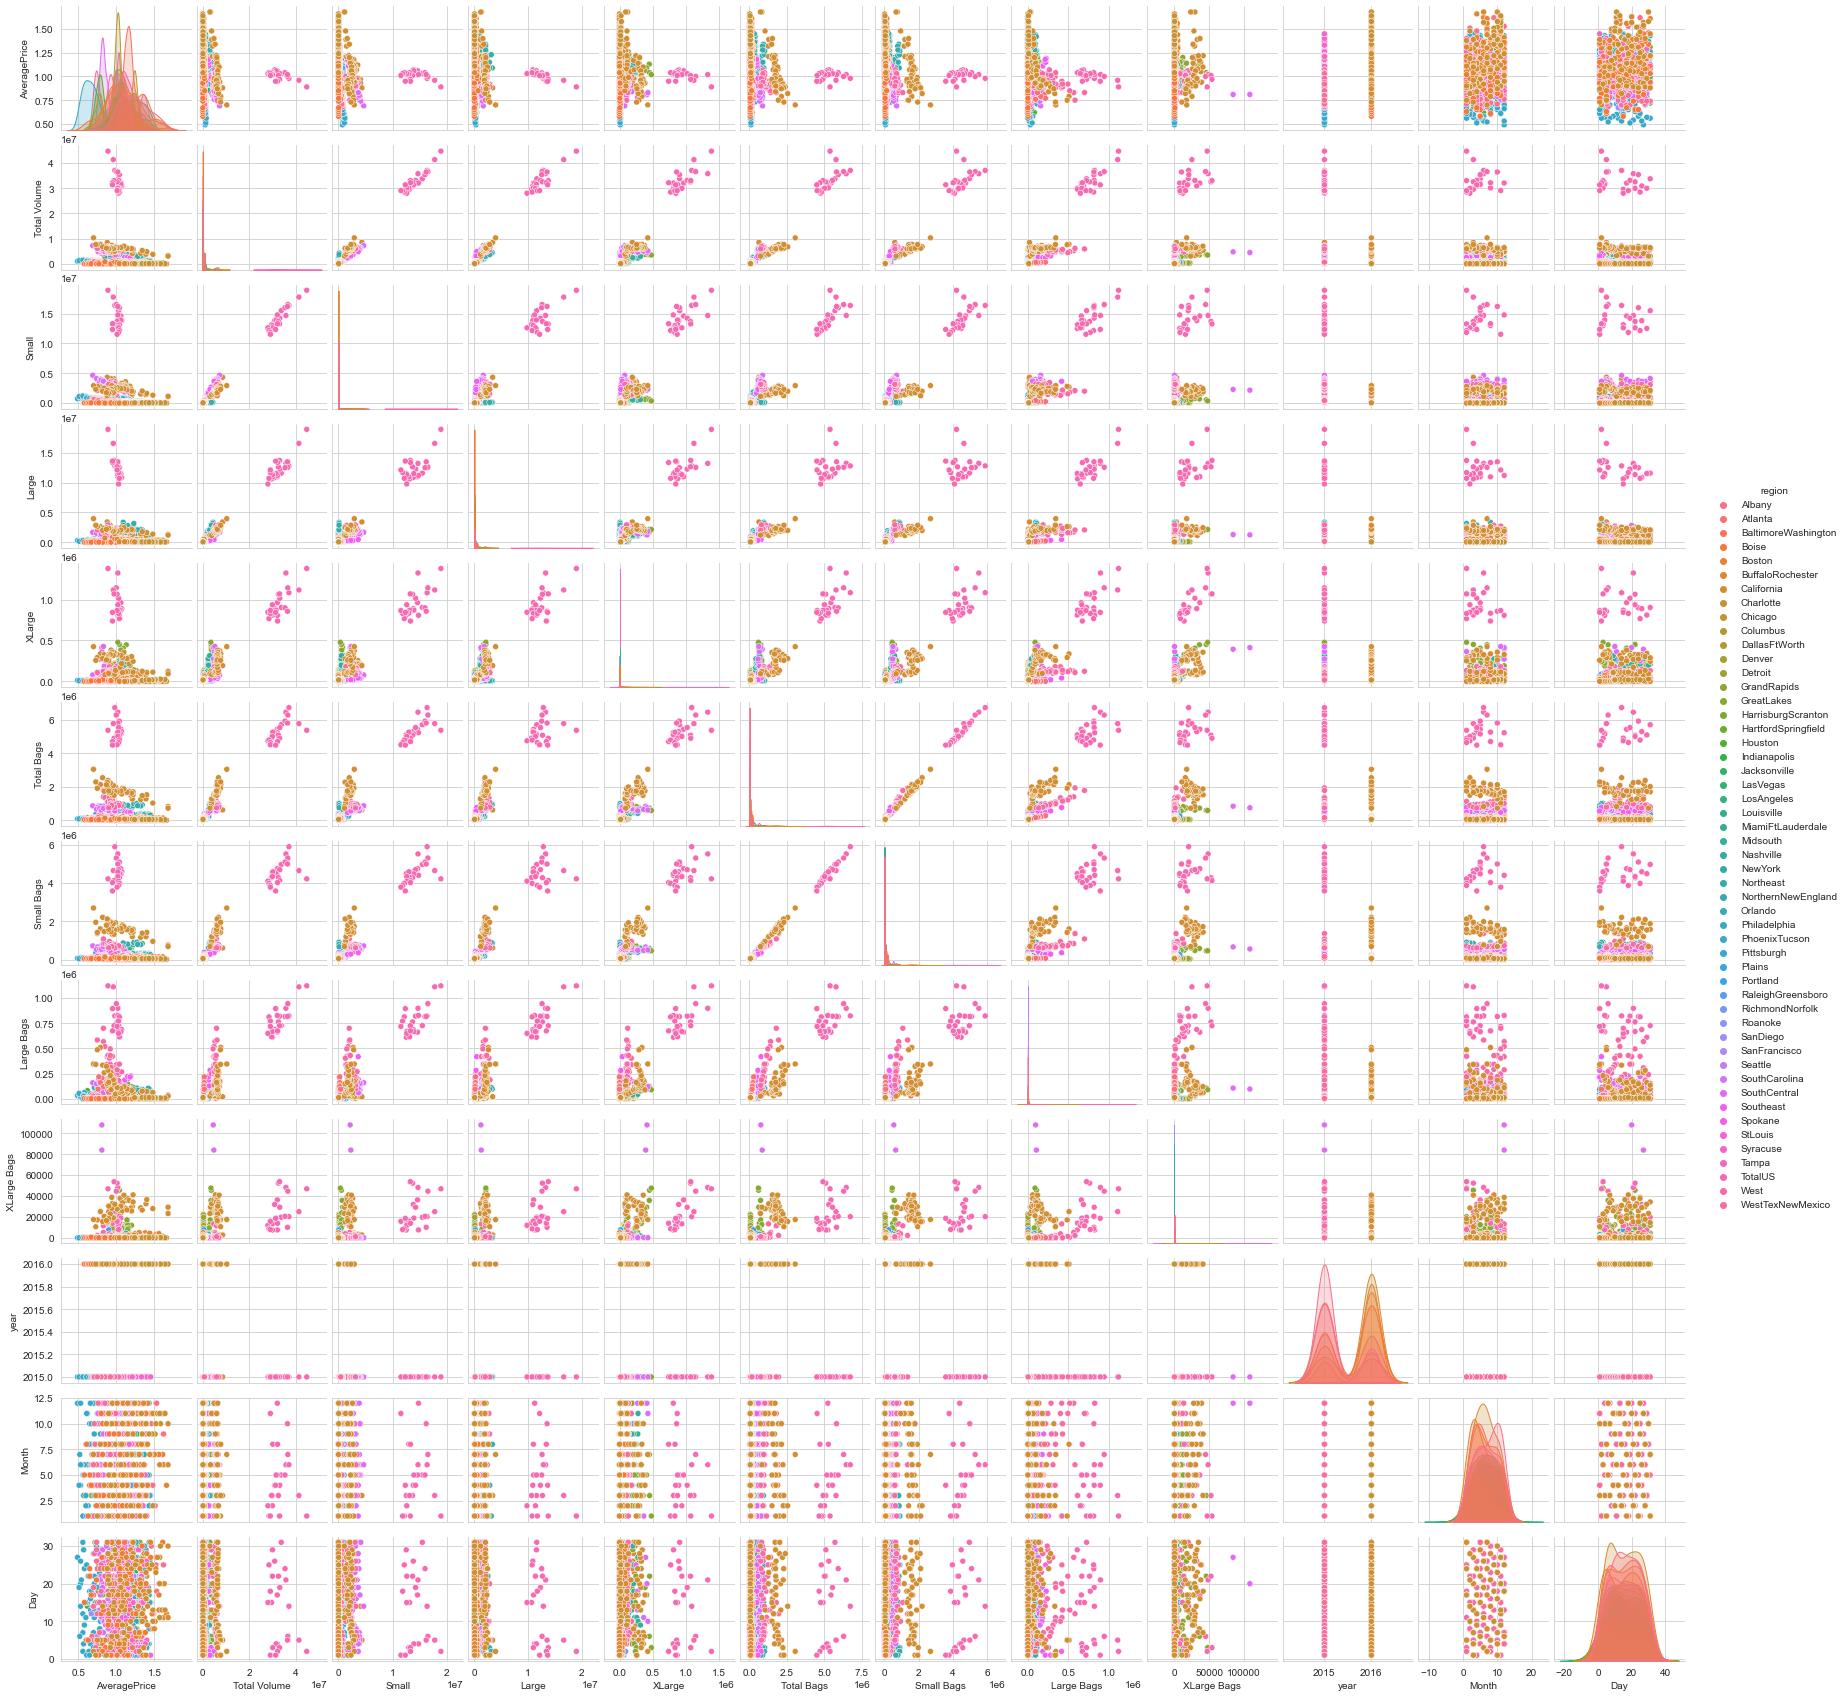

In [346]:
sns.pairplot(avo,hue='region',height=2)

the above visualization based on region comsidering all columns 

In [347]:

avo=pd.get_dummies(avo.drop(['region','Date','type'],axis=1),drop_first=True)

<AxesSubplot:>

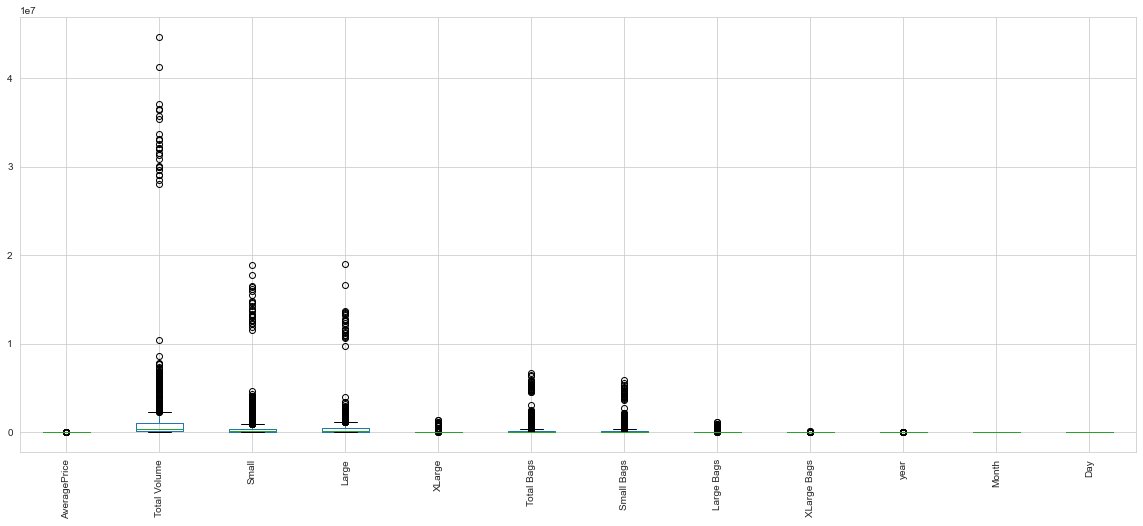

In [348]:
avo.boxplot( rot = 90, figsize=(20,8))

There are outliers present in  dataset as observed in above visualization

In [349]:
from scipy.stats import zscore
z=np.abs(zscore(avo.iloc[:,1:]))
avo_new=avo[(z<3).all(axis=1)]

the outliers are removed and saved in different variable

In [350]:
avo.shape

(1517, 12)

shape of dataset before removing outliers

In [351]:
avo_new.shape

(1439, 12)

Shape of columns after removing outliers

In [352]:
avo=avo_new

the new data set is saved in avo Dataframe

In [353]:
avo.skew()

AveragePrice   -0.164097
Total Volume    2.699607
Small           3.117671
Large           2.364213
XLarge          3.329694
Total Bags      4.153979
Small Bags      4.394953
Large Bags      3.521463
XLarge Bags     5.107058
year            1.992181
Month           0.110961
Day             0.040894
dtype: float64

There are skewness present in many columns 

<AxesSubplot:ylabel='Frequency'>

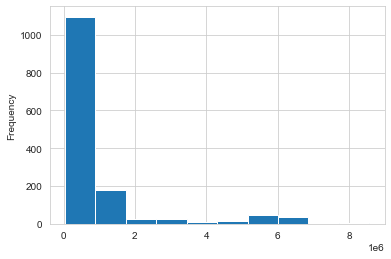

In [354]:
avo['Total Volume'].plot.hist()

0.0


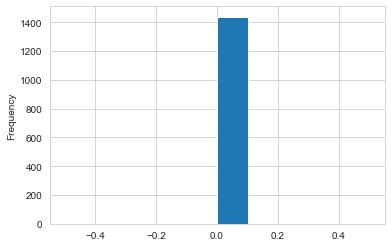

In [355]:
avo['Total Volume']=power_transform(avo[['Total Volume']], method='yeo-johnson')
avo['Total Volume'].plot.hist()
print(skew(avo['Total Volume']))

<AxesSubplot:ylabel='Frequency'>

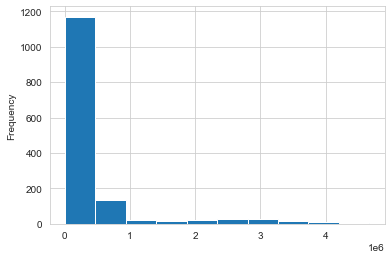

In [356]:
avo['Small'].plot.hist()

-0.026215085598088612


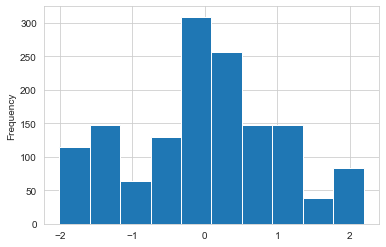

In [357]:
avo['Small']=power_transform(avo[['Small']], method='yeo-johnson')
avo['Small'].plot.hist()
print(skew(avo['Small']))

<AxesSubplot:ylabel='Frequency'>

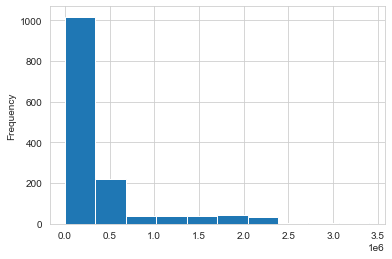

In [358]:
avo['Large'].plot.hist()

0.000766528301574753


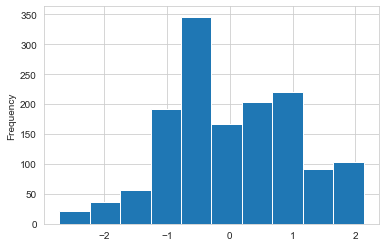

In [359]:
avo['Large']=power_transform(avo[['Large']], method='yeo-johnson')
avo['Large'].plot.hist()
print(skew(avo['Large']))

<AxesSubplot:ylabel='Frequency'>

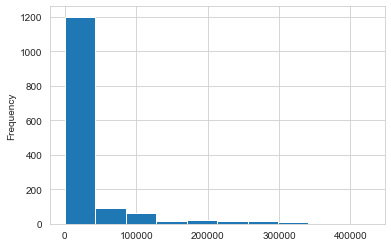

In [360]:
avo['XLarge'].plot.hist()

-0.05512258373005364


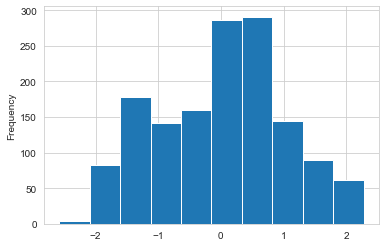

In [361]:
avo['XLarge']=power_transform(avo[['XLarge']], method='yeo-johnson')
avo['XLarge'].plot.hist()
print(skew(avo['XLarge']))

<AxesSubplot:ylabel='Frequency'>

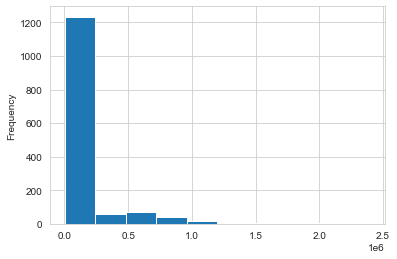

In [362]:
avo['Total Bags'].plot.hist()

0.0


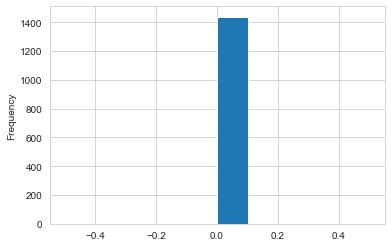

In [363]:
avo['Total Bags']=power_transform(avo[['Total Bags']], method='yeo-johnson')
avo['Total Bags'].plot.hist()
print(skew(avo['Total Bags']))

<AxesSubplot:ylabel='Frequency'>

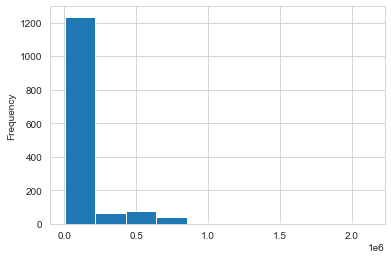

In [364]:
avo['Small Bags'].plot.hist()

0.0


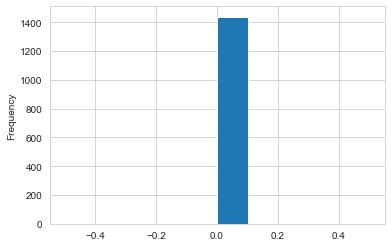

In [365]:
avo['Small Bags']=power_transform(avo[['Small Bags']], method='yeo-johnson')
avo['Small Bags'].plot.hist()
print(skew(avo['Small Bags']))

<AxesSubplot:ylabel='Frequency'>

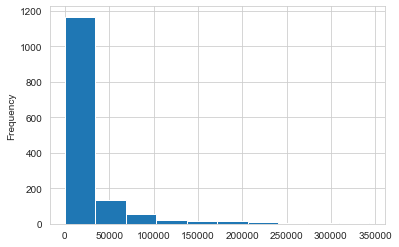

In [366]:
avo['Large Bags'].plot.hist()

-0.1180278026939694


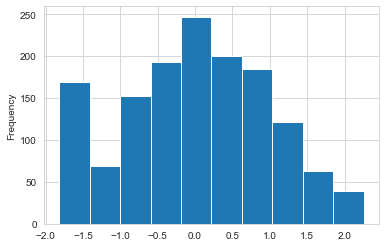

In [367]:
avo['Large Bags']=power_transform(avo[['Large Bags']], method='yeo-johnson')
avo['Large Bags'].plot.hist()
print(skew(avo['Large Bags']))

<AxesSubplot:ylabel='Frequency'>

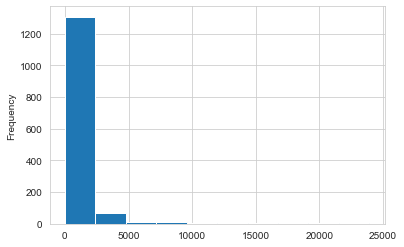

In [368]:
avo['XLarge Bags'].plot.hist()

0.4783942326531505


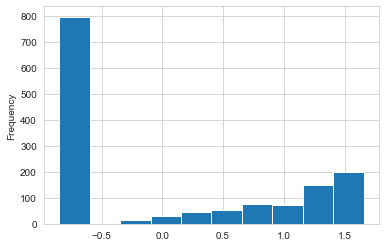

In [369]:
avo['XLarge Bags']=power_transform(avo[['XLarge Bags']], method='yeo-johnson')
avo['XLarge Bags'].plot.hist()
print(skew(avo['XLarge Bags']))

<AxesSubplot:ylabel='Frequency'>

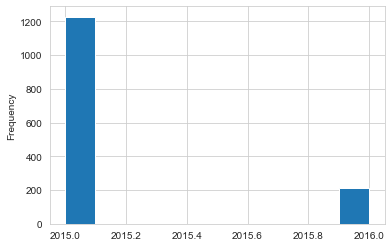

In [370]:
avo['year'].plot.hist()

0.0


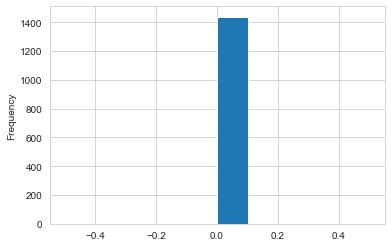

In [371]:
avo['year']=power_transform(avo[['year']], method='yeo-johnson')
avo['year'].plot.hist()
print(skew(avo['year']))

The skewness has been removed for columns having +-0.5 as threshold for removing skewness and powertransform is been used to handle skewness

In [372]:
x=avo.iloc[:,1:]
y=avo['AveragePrice']

splitting data

In [373]:
from sklearn.preprocessing import StandardScaler 

x = StandardScaler().fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

performing standard scalar and splitting data for ml

In [374]:
models = []
models.append(('XGBRegressor', XGBRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('linear_model.Ridge', linear_model.Ridge()))
models.append(('LinearRegression', linear_model.LinearRegression()))


# evaluate each model in turn


for name, model in models:
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    sc = cross_val_score(model, x_test, y_test, scoring='r2', cv=6)
    
  

  
    print(name)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('\n')
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('\n')

    print(sc)
    print('\n----------------------------------')
    print('\n')
   
    
    

XGBRegressor
MAE: 0.07354259042276277
MSE: 0.009792718552145366


RMSE: 0.09895816566683806


[0.66275468 0.66052913 0.56157119 0.75014917 0.27001284 0.48745555]

----------------------------------


GradientBoostingRegressor
MAE: 0.07879337434769419
MSE: 0.012567439179717385


RMSE: 0.11210459035970555


[0.63315079 0.66270882 0.54415773 0.65450705 0.19847492 0.34887298]

----------------------------------


RandomForestRegressor
MAE: 0.06696701388888891
MSE: 0.008808131770833331


RMSE: 0.0938516476724481


[0.59846031 0.7204696  0.61583382 0.67145163 0.25392828 0.47128786]

----------------------------------


DecisionTreeRegressor
MAE: 0.09225694444444445
MSE: 0.019594097222222225


RMSE: 0.1399789170633286


[ 0.31710531  0.60330847  0.59173739  0.64919571 -0.20525713 -0.41411177]

----------------------------------


linear_model.Ridge
MAE: 0.11413836785334859
MSE: 0.0230729999557091


RMSE: 0.15189799194100329


[0.33351006 0.41091756 0.22644674 0.33516909 0.23960254 0.25621296]

XGBRegressor'
GradientBoostingRegressor
RandomForestRegressor',
DecisionTreeRegressor', 
LinearRegression',

the above 5 regressor are used and for loop is been applied for best prformance among which Random forest has least Rmse score so thos model performs best

In [375]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

def evalz(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evalz(base_model, x_test, y_test)
grid_search.fit(x_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evalz(best_grid, x_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 0.0732 degrees.
Accuracy = 93.24%.
Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   54.8s finished


Model Performance
Average Error: 0.0752 degrees.
Accuracy = 92.91%.
Improvement of -0.35%.


performing hyperparameter tuning on random forest regressor and model doest show imprvement so its better to continue without tuning 

Saving model

In [376]:
import joblib
joblib.dump(rf,"AVO.obj")

['AVO.obj']